In [ ]:
# Course: Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale,normalize,minmax_scale

In [2]:
mydata=pd.read_csv(r'C:\Users\KIKI\Desktop\HR_comma_sep.csv')
mydata

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,111,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
mydata.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
mydata.shape

(14999, 10)

In [6]:
mydata.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.162878,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,50.785972,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,1000.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
a=mydata.number_project.value_counts()
a

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

In [8]:
b=mydata.time_spend_company.value_counts()
b

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

In [9]:
category=a.index
category

Index([4, 3, 5, 2, 6, 7], dtype='int64', name='number_project')

In [10]:
# s=mydata.pd.to_numeric()
# s

In [11]:
mydata.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [12]:
#چون دیتای ایزنال ندارن پس اتفاقی رخ نمیده
mydata.drop(index=mydata.Department[mydata.Department.isnull()].index, inplace=True)
mydata.shape

(14999, 10)

In [13]:
#چون دیتای ایزنال ندارن پس اتفاقی رخ نمیده
mydata.drop(index=mydata.salary[mydata.salary.isnull()].index, inplace=True)
mydata.shape

(14999, 10)

In [14]:
mydata.drop_duplicates(inplace=True)
mydata.shape

(11994, 10)

In [15]:
mydata['total_time_needed_on_projects'] = mydata['number_project'] * mydata['time_spend_company']
mydata

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,total_time_needed_on_projects
0,0.38,0.53,2,111,3,0,1,0,sales,low,6
1,0.80,0.86,5,262,6,0,1,0,sales,medium,30
2,0.11,0.88,7,272,4,0,1,0,sales,medium,28
3,0.72,0.87,5,223,5,0,1,0,sales,low,25
4,0.37,0.52,2,159,3,0,1,0,sales,low,6
...,...,...,...,...,...,...,...,...,...,...,...
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,30
11999,0.50,0.73,4,180,3,0,0,0,IT,low,12
12000,0.38,0.53,2,157,3,0,1,0,sales,low,6
12029,0.38,0.50,2,132,3,0,1,0,accounting,low,6


In [16]:
mydata['total_time_spent_on_projects'] = mydata['time_spend_company'] * mydata['left']
mydata

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,total_time_needed_on_projects,total_time_spent_on_projects
0,0.38,0.53,2,111,3,0,1,0,sales,low,6,3
1,0.80,0.86,5,262,6,0,1,0,sales,medium,30,6
2,0.11,0.88,7,272,4,0,1,0,sales,medium,28,4
3,0.72,0.87,5,223,5,0,1,0,sales,low,25,5
4,0.37,0.52,2,159,3,0,1,0,sales,low,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,30,0
11999,0.50,0.73,4,180,3,0,0,0,IT,low,12,0
12000,0.38,0.53,2,157,3,0,1,0,sales,low,6,3
12029,0.38,0.50,2,132,3,0,1,0,accounting,low,6,3


In [17]:
mydata.drop(mydata[mydata['last_evaluation'] < mydata['satisfaction_level']].index, inplace=True)
mydata

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,total_time_needed_on_projects,total_time_spent_on_projects
0,0.38,0.53,2,111,3,0,1,0,sales,low,6,3
1,0.80,0.86,5,262,6,0,1,0,sales,medium,30,6
2,0.11,0.88,7,272,4,0,1,0,sales,medium,28,4
3,0.72,0.87,5,223,5,0,1,0,sales,low,25,5
4,0.37,0.52,2,159,3,0,1,0,sales,low,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,30,0
11999,0.50,0.73,4,180,3,0,0,0,IT,low,12,0
12000,0.38,0.53,2,157,3,0,1,0,sales,low,6,3
12029,0.38,0.50,2,132,3,0,1,0,accounting,low,6,3


In [18]:
category=mydata.index
category

Index([    0,     1,     2,     3,     4,     5,     6,     8,     9,    10,
       ...
       11988, 11990, 11992, 11994, 11996, 11998, 11999, 12000, 12029, 12031],
      dtype='int64', length=7515)

In [19]:
mydata.rename(columns={'satisfaction_level':'sat_level'},inplace=True)
mydata.rename(columns={'last_evaluation':'last_eval'},inplace=True)
mydata.rename(columns={'number_project':'num_proj'},inplace=True)
mydata.rename(columns={'average_montly_hours':'avg_hours_mon'},inplace=True)
mydata.rename(columns={'time_spend_company':'T_spend'},inplace=True)
mydata.rename(columns={'Work_accident':'work_acc'},inplace=True)
mydata.rename(columns={'promotion_last_5years':'promo_last5yrs'},inplace=True)
mydata.rename(columns={'Department':'Dept'},inplace=True)
mydata.rename(columns={'total_time_needed_on_projects':'totaT_needed'},inplace=True)
mydata.rename(columns={'total_time_spent_on_projects':'totaT_spent'},inplace=True)
mydata

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,Dept,salary,totaT_needed,totaT_spent
0,0.38,0.53,2,111,3,0,1,0,sales,low,6,3
1,0.80,0.86,5,262,6,0,1,0,sales,medium,30,6
2,0.11,0.88,7,272,4,0,1,0,sales,medium,28,4
3,0.72,0.87,5,223,5,0,1,0,sales,low,25,5
4,0.37,0.52,2,159,3,0,1,0,sales,low,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,30,0
11999,0.50,0.73,4,180,3,0,0,0,IT,low,12,0
12000,0.38,0.53,2,157,3,0,1,0,sales,low,6,3
12029,0.38,0.50,2,132,3,0,1,0,accounting,low,6,3


In [20]:
maxsatisfaction=mydata['sat_level'].max()
maxsatisfaction_dept = mydata['Dept'][mydata['sat_level'] == maxsatisfaction]
print(maxsatisfaction_dept)
print(maxsatisfaction)

4143    sales
Name: Dept, dtype: object
1.0


In [21]:
maxavg_hours_mon=mydata['avg_hours_mon'].max()
maxavg_hours_mon_Dept = mydata['Dept'][mydata['avg_hours_mon'] == maxavg_hours_mon]
print(maxavg_hours_mon_Dept)
print(maxavg_hours_mon)

29    accounting
31            hr
Name: Dept, dtype: object
1000


In [22]:
minavg_hours_mon=mydata['avg_hours_mon'].min()
minavg_hours_mon_Dept = mydata['Dept'][mydata['avg_hours_mon'] == minavg_hours_mon]
print(minavg_hours_mon_Dept)
print(minavg_hours_mon)

6778        IT
7492     sales
10020    sales
Name: Dept, dtype: object
96


In [23]:
mydata.loc[1, 'left'] = None
imputer = SimpleImputer(strategy='constant', fill_value=3)
mydata.loc[[1], ['left']] = imputer.fit_transform(mydata.loc[[1], ['left']])
print(mydata)

       sat_level  last_eval  num_proj  avg_hours_mon  T_spend  work_acc  left  \
0           0.38       0.53         2            111        3         0   1.0   
1           0.80       0.86         5            262        6         0   3.0   
2           0.11       0.88         7            272        4         0   1.0   
3           0.72       0.87         5            223        5         0   1.0   
4           0.37       0.52         2            159        3         0   1.0   
...          ...        ...       ...            ...      ...       ...   ...   
11998       0.33       0.65         3            172       10         0   0.0   
11999       0.50       0.73         4            180        3         0   0.0   
12000       0.38       0.53         2            157        3         0   1.0   
12029       0.38       0.50         2            132        3         0   1.0   
12031       0.45       0.57         2            134        3         0   1.0   

       promo_last5yrs      

In [24]:
aa=pd.DataFrame(mydata)
aa

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,Dept,salary,totaT_needed,totaT_spent
0,0.38,0.53,2,111,3,0,1.0,0,sales,low,6,3
1,0.80,0.86,5,262,6,0,3.0,0,sales,medium,30,6
2,0.11,0.88,7,272,4,0,1.0,0,sales,medium,28,4
3,0.72,0.87,5,223,5,0,1.0,0,sales,low,25,5
4,0.37,0.52,2,159,3,0,1.0,0,sales,low,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
11998,0.33,0.65,3,172,10,0,0.0,1,marketing,high,30,0
11999,0.50,0.73,4,180,3,0,0.0,0,IT,low,12,0
12000,0.38,0.53,2,157,3,0,1.0,0,sales,low,6,3
12029,0.38,0.50,2,132,3,0,1.0,0,accounting,low,6,3


<Axes: xlabel='sat_level', ylabel='last_eval'>

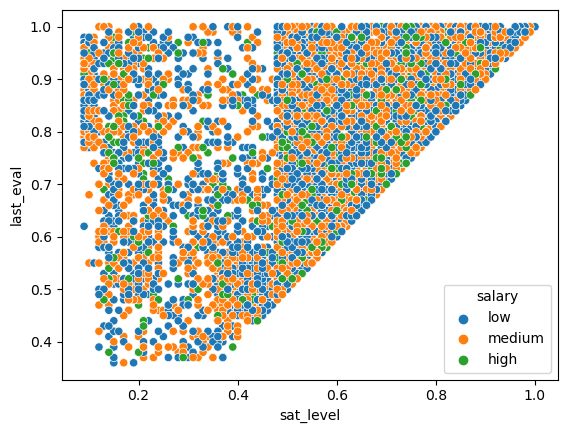

In [25]:
# فکر نمیکنم اینجا کاربردی داشته باشه 
ww=sb.scatterplot(x=mydata['sat_level'],y=mydata['last_eval'],hue=mydata['salary'])
ww

C:\Users\KIKI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


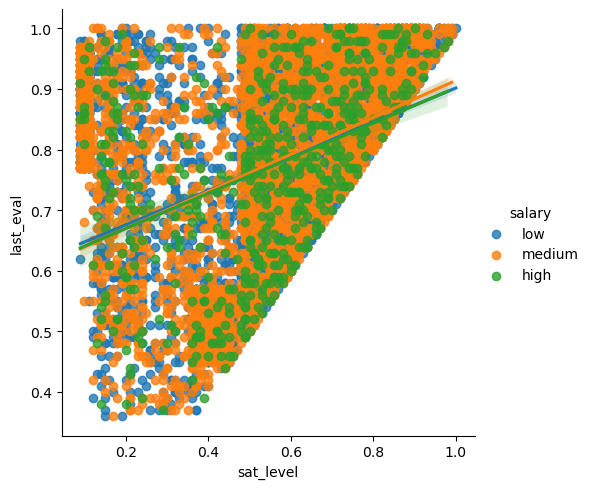

In [26]:
###################### همبستگی هر کدوم جدا فک کنم کاربردی نداره اینجا
kk=sb.lmplot(x='sat_level',y='last_eval',hue='salary',data=mydata)
kk

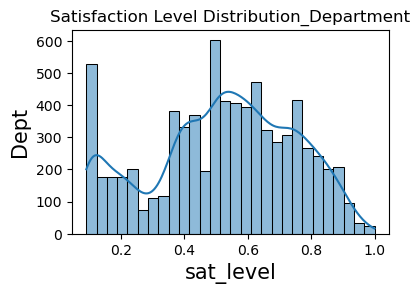

In [27]:
# plt.margins(0.05)
plt.figure(figsize=(9,9))
plt.subplot(3, 2, 1)
sb.histplot(mydata['sat_level'], kde=True)
plt.xlabel('sat_level',fontsize=15)
plt.ylabel('Dept',fontsize=15)
plt.title('Satisfaction Level Distribution_Department')
plt.show()

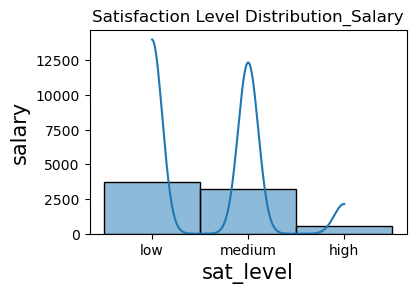

In [28]:
plt.figure(figsize=(9,9))
plt.subplot(3, 2, 1)
sb.histplot(mydata['salary'], kde=True)
plt.xlabel('sat_level', fontsize=15)
plt.ylabel('salary' ,fontsize=15)
# plt.xticks([1,2,3])
plt.title('Satisfaction Level Distribution_Salary')
plt.show()

In [29]:
mydata.replace(['low','medium','high'],[1,2,3],inplace=True)
mydata

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,Dept,salary,totaT_needed,totaT_spent
0,0.38,0.53,2,111,3,0,1.0,0,sales,1,6,3
1,0.80,0.86,5,262,6,0,3.0,0,sales,2,30,6
2,0.11,0.88,7,272,4,0,1.0,0,sales,2,28,4
3,0.72,0.87,5,223,5,0,1.0,0,sales,1,25,5
4,0.37,0.52,2,159,3,0,1.0,0,sales,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
11998,0.33,0.65,3,172,10,0,0.0,1,marketing,3,30,0
11999,0.50,0.73,4,180,3,0,0.0,0,IT,1,12,0
12000,0.38,0.53,2,157,3,0,1.0,0,sales,1,6,3
12029,0.38,0.50,2,132,3,0,1.0,0,accounting,1,6,3


In [30]:
mydata_group=mydata.groupby('Dept').mean()
mydata_group

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,salary,totaT_needed,totaT_spent
Dept,,,,,,,,,,,
IT,0.520084,0.764305,3.807370,200.261307,3.480737,0.134003,0.251256,0.001675,1.579564,13.619765,0.951424
RandD,0.514397,0.768865,3.877069,201.503546,3.453901,0.163121,0.189125,0.037825,1.605201,13.964539,0.742317
accounting,0.508892,0.763060,3.884337,203.939759,3.532530,0.134940,0.255422,0.012048,1.607229,14.033735,0.975904
hr,0.516667,0.754261,3.666667,200.120301,3.403509,0.117794,0.278195,0.012531,1.548872,12.892231,1.027569
management,0.537133,0.780681,3.824373,203.143369,4.014337,0.146953,0.175627,0.075269,1.960573,15.559140,0.655914
marketing,0.527929,0.766119,3.769048,198.897619,3.602381,0.154762,0.257143,0.033333,1.578571,14.069048,0.985714
product_mng,0.526515,0.762027,3.813212,199.068337,3.437358,0.138952,0.241458,0.000000,1.535308,13.574032,0.940774
sales,0.517024,0.762190,3.809164,198.907351,3.494965,0.139980,0.267875,0.016616,1.568983,13.737664,1.012588
support,0.530643,0.773032,3.886186,200.899218,3.406603,0.158123,0.260643,0.008688,1.576021,13.608167,1.026933


In [31]:
mydata_group1=mydata_group.astype(float).applymap('{:,.2f}'.format)
mydata_group1

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,salary,totaT_needed,totaT_spent
Dept,,,,,,,,,,,
IT,0.52,0.76,3.81,200.26,3.48,0.13,0.25,0.00,1.58,13.62,0.95
RandD,0.51,0.77,3.88,201.50,3.45,0.16,0.19,0.04,1.61,13.96,0.74
accounting,0.51,0.76,3.88,203.94,3.53,0.13,0.26,0.01,1.61,14.03,0.98
hr,0.52,0.75,3.67,200.12,3.40,0.12,0.28,0.01,1.55,12.89,1.03
management,0.54,0.78,3.82,203.14,4.01,0.15,0.18,0.08,1.96,15.56,0.66
marketing,0.53,0.77,3.77,198.90,3.60,0.15,0.26,0.03,1.58,14.07,0.99
product_mng,0.53,0.76,3.81,199.07,3.44,0.14,0.24,0.00,1.54,13.57,0.94
sales,0.52,0.76,3.81,198.91,3.49,0.14,0.27,0.02,1.57,13.74,1.01
support,0.53,0.77,3.89,200.90,3.41,0.16,0.26,0.01,1.58,13.61,1.03


In [32]:
ee=mydata_group.tail(4)
ee

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,salary,totaT_needed,totaT_spent
Dept,,,,,,,,,,,
product_mng,0.526515,0.762027,3.813212,199.068337,3.437358,0.138952,0.241458,0.000000,1.535308,13.574032,0.940774
sales,0.517024,0.762190,3.809164,198.907351,3.494965,0.139980,0.267875,0.016616,1.568983,13.737664,1.012588
support,0.530643,0.773032,3.886186,200.899218,3.406603,0.158123,0.260643,0.008688,1.576021,13.608167,1.026933
technical,0.521529,0.773122,3.881935,204.373400,3.394026,0.146515,0.265292,0.007112,1.554054,13.660740,1.041252


In [33]:
yy=mydata_group.head(4)
yy

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,salary,totaT_needed,totaT_spent
Dept,,,,,,,,,,,
IT,0.520084,0.764305,3.807370,200.261307,3.480737,0.134003,0.251256,0.001675,1.579564,13.619765,0.951424
RandD,0.514397,0.768865,3.877069,201.503546,3.453901,0.163121,0.189125,0.037825,1.605201,13.964539,0.742317
accounting,0.508892,0.763060,3.884337,203.939759,3.532530,0.134940,0.255422,0.012048,1.607229,14.033735,0.975904
hr,0.516667,0.754261,3.666667,200.120301,3.403509,0.117794,0.278195,0.012531,1.548872,12.892231,1.027569


In [34]:
u=np.concatenate((ee,yy),axis=0)
i=np.concatenate((ee,yy),axis=0)
print(u)
print(i)

[[5.26514806e-01 7.62027335e-01 3.81321185e+00 1.99068337e+02
  3.43735763e+00 1.38952164e-01 2.41457859e-01 0.00000000e+00
  1.53530752e+00 1.35740319e+01 9.40774487e-01]
 [5.17024169e-01 7.62190332e-01 3.80916415e+00 1.98907351e+02
  3.49496475e+00 1.39979859e-01 2.67875126e-01 1.66163142e-02
  1.56898288e+00 1.37376636e+01 1.01258812e+00]
 [5.30642919e-01 7.73032146e-01 3.88618593e+00 2.00899218e+02
  3.40660295e+00 1.58123371e-01 2.60642919e-01 8.68809731e-03
  1.57602085e+00 1.36081668e+01 1.02693310e+00]
 [5.21529161e-01 7.73122333e-01 3.88193457e+00 2.04373400e+02
  3.39402560e+00 1.46514936e-01 2.65291607e-01 7.11237553e-03
  1.55405405e+00 1.36607397e+01 1.04125178e+00]
 [5.20083752e-01 7.64304858e-01 3.80737018e+00 2.00261307e+02
  3.48073702e+00 1.34003350e-01 2.51256281e-01 1.67504188e-03
  1.57956449e+00 1.36197655e+01 9.51423786e-01]
 [5.14397163e-01 7.68865248e-01 3.87706856e+00 2.01503546e+02
  3.45390071e+00 1.63120567e-01 1.89125296e-01 3.78250591e-02
  1.60520095e+00

<Axes: xlabel='num_proj', ylabel='last_eval'>

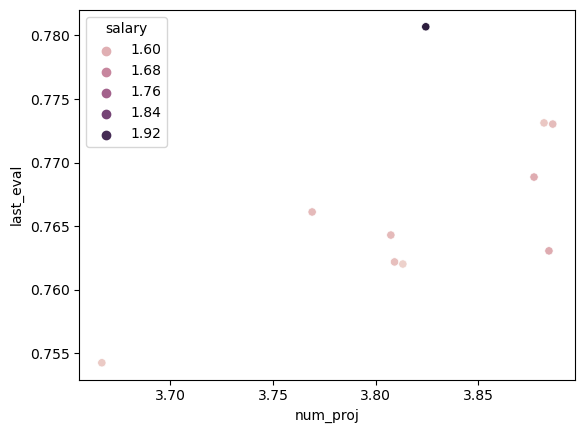

In [35]:
ww=sb.scatterplot(x=mydata_group['num_proj'],y=mydata_group['last_eval'],hue=mydata_group['salary'])
ww

In [36]:
mydata_group.drop(['sat_level','last_eval','num_proj','avg_hours_mon','work_acc','left','promo_last5yrs','salary','totaT_spent','totaT_needed'],axis=1,inplace=True)
mydata_group

,T_spend
Dept,
IT,3.480737
RandD,3.453901
accounting,3.532530
hr,3.403509
management,4.014337
marketing,3.602381
product_mng,3.437358
sales,3.494965
support,3.406603


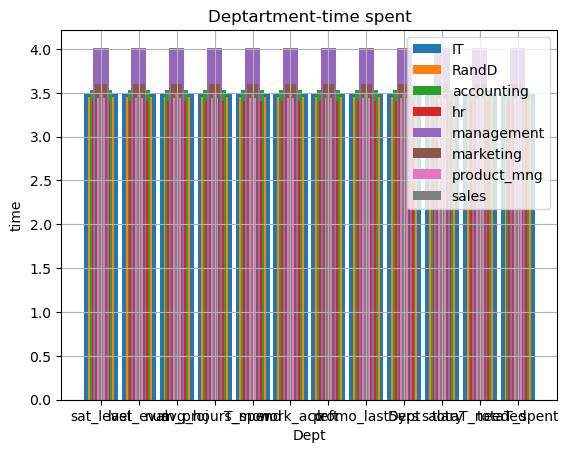

In [37]:
plt.bar(mydata.columns,mydata_group.loc['IT'], 0.9, label='IT')
plt.bar(mydata.columns,mydata_group.loc['RandD'], 0.7, label='RandD')
plt.bar(mydata.columns,mydata_group.loc['accounting'], 0.6, label='accounting')
plt.bar(mydata.columns,mydata_group.loc['hr'], 0.5, label='hr')
plt.bar(mydata.columns,mydata_group.loc['management'], 0.4, label='management')
plt.bar(mydata.columns,mydata_group.loc['marketing'], 0.3, label='marketing')
plt.bar(mydata.columns,mydata_group.loc['product_mng'], 0.2, label='product_mng')
plt.bar(mydata.columns,mydata_group.loc['sales'], 0.1, label='sales')

plt.title('Deptartment-time spent')
plt.xlabel('Dept')
plt.ylabel('time')
plt.legend()
plt.grid()
plt.show()

In [38]:
mydata_data=pd.get_dummies(mydata)
mydata_data.replace([True,False],[1,0],inplace=True)
mydata_data

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,salary,totaT_needed,...,Dept_IT,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical
0,0.38,0.53,2,111,3,0,1.0,0,1,6,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,3.0,0,2,30,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1.0,0,2,28,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1.0,0,1,25,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1.0,0,1,6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11998,0.33,0.65,3,172,10,0,0.0,1,3,30,...,0,0,0,0,0,1,0,0,0,0
11999,0.50,0.73,4,180,3,0,0.0,0,1,12,...,1,0,0,0,0,0,0,0,0,0
12000,0.38,0.53,2,157,3,0,1.0,0,1,6,...,0,0,0,0,0,0,0,1,0,0
12029,0.38,0.50,2,132,3,0,1.0,0,1,6,...,0,0,1,0,0,0,0,0,0,0


<Axes: xlabel='sat_level', ylabel='last_eval'>

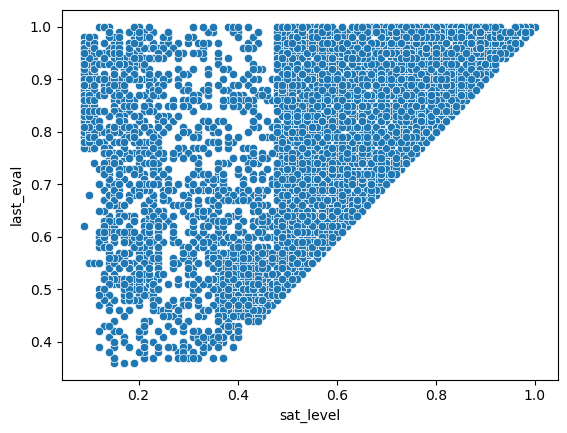

In [39]:
pp=sb.scatterplot(x=mydata_data['sat_level'],y=mydata_data['last_eval'])
pp

<Axes: xlabel='sat_level', ylabel='last_eval'>

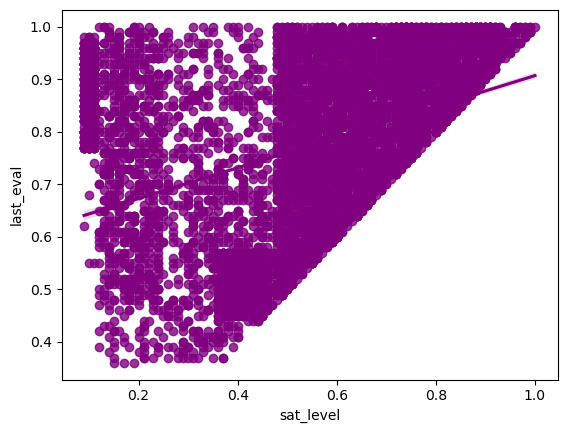

In [40]:
sb.regplot(x=mydata_data['sat_level'],y=mydata_data['last_eval'],color='purple')

In [41]:
o=mydata_data.head()
o

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,salary,totaT_needed,...,Dept_IT,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical
0,0.38,0.53,2,111,3,0,1.0,0,1,6,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,3.0,0,2,30,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1.0,0,2,28,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1.0,0,1,25,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1.0,0,1,6,...,0,0,0,0,0,0,0,1,0,0


In [42]:
mydata_data.describe()

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,salary,totaT_needed,...,Dept_IT,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical
count,7515.00000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,...,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000
mean,0.52149,0.766963,3.833400,200.997206,3.478244,0.144378,0.254824,0.015303,1.584298,13.754890,...,0.079441,0.056287,0.055223,0.053094,0.037126,0.055888,0.058417,0.264271,0.153160,0.187092
std,0.22474,0.167013,1.280441,52.439507,1.332283,0.351496,0.436706,0.122762,0.627570,7.927662,...,0.270444,0.230491,0.228430,0.224235,0.189082,0.229721,0.234545,0.440974,0.360166,0.390012
min,0.09000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.38000,0.630000,3.000000,155.000000,3.000000,0.000000,0.000000,0.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.54000,0.800000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000,2.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.70000,0.910000,5.000000,246.000000,4.000000,0.000000,1.000000,0.000000,2.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.00000,1.000000,7.000000,1000.000000,10.000000,1.000000,3.000000,1.000000,3.000000,60.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
scale_data=scale(mydata_data)   #raveshe scale
scale_data

array([[-0.6296155 , -1.41892404, -1.43194592, ...,  1.66852867,
        -0.42527767, -0.47974184],
       [ 1.23933532,  0.55709808,  0.91115328, ...,  1.66852867,
        -0.42527767, -0.47974184],
       [-1.83108389,  0.676857  ,  2.47321941, ...,  1.66852867,
        -0.42527767, -0.47974184],
       ...,
       [-0.6296155 , -1.41892404, -1.43194592, ...,  1.66852867,
        -0.42527767, -0.47974184],
       [-0.6296155 , -1.59856241, -1.43194592, ..., -0.59933043,
        -0.42527767, -0.47974184],
       [-0.3181237 , -1.17940621, -1.43194592, ..., -0.59933043,
        -0.42527767, -0.47974184]])

In [45]:
df_mydata=pd.DataFrame(scale_data,index=mydata_data.index,columns=mydata_data.columns)
df_mydata

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,salary,totaT_needed,...,Dept_IT,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical
0,-0.629616,-1.418924,-1.431946,-1.716324,-0.358989,-0.41078,1.706469,-0.124662,-0.931110,-0.978272,...,-0.293763,-0.244223,-0.241766,-0.236793,-0.19636,-0.243304,-0.24908,1.668529,-0.425278,-0.479742
1,1.239335,0.557098,0.911153,1.163376,1.892934,-0.41078,6.286512,-0.124662,0.662443,2.049304,...,-0.293763,-0.244223,-0.241766,-0.236793,-0.19636,-0.243304,-0.24908,1.668529,-0.425278,-0.479742
2,-1.831084,0.676857,2.473219,1.354084,0.391652,-0.41078,1.706469,-0.124662,0.662443,1.797006,...,-0.293763,-0.244223,-0.241766,-0.236793,-0.19636,-0.243304,-0.24908,1.668529,-0.425278,-0.479742
3,0.883345,0.616978,0.911153,0.419612,1.142293,-0.41078,1.706469,-0.124662,-0.931110,1.418559,...,-0.293763,-0.244223,-0.241766,-0.236793,-0.19636,-0.243304,-0.24908,1.668529,-0.425278,-0.479742
4,-0.674114,-1.478803,-1.431946,-0.800923,-0.358989,-0.41078,1.706469,-0.124662,-0.931110,-0.978272,...,-0.293763,-0.244223,-0.241766,-0.236793,-0.19636,-0.243304,-0.24908,1.668529,-0.425278,-0.479742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11998,-0.852110,-0.700371,-0.650913,-0.553002,4.895498,-0.41078,-0.583552,8.021710,2.255996,2.049304,...,-0.293763,-0.244223,-0.241766,-0.236793,-0.19636,4.110092,-0.24908,-0.599330,-0.425278,-0.479742
11999,-0.095630,-0.221335,0.130120,-0.400435,-0.358989,-0.41078,-0.583552,-0.124662,-0.931110,-0.221378,...,3.404106,-0.244223,-0.241766,-0.236793,-0.19636,-0.243304,-0.24908,-0.599330,-0.425278,-0.479742
12000,-0.629616,-1.418924,-1.431946,-0.839065,-0.358989,-0.41078,1.706469,-0.124662,-0.931110,-0.978272,...,-0.293763,-0.244223,-0.241766,-0.236793,-0.19636,-0.243304,-0.24908,1.668529,-0.425278,-0.479742
12029,-0.629616,-1.598562,-1.431946,-1.315836,-0.358989,-0.41078,1.706469,-0.124662,-0.931110,-0.978272,...,-0.293763,-0.244223,4.136234,-0.236793,-0.19636,-0.243304,-0.24908,-0.599330,-0.425278,-0.479742


In [46]:
norm_data=normalize(mydata_data,norm='l1',axis=0)   #raveshe normalize
norm_data

array([[9.69635111e-05, 9.19543421e-05, 6.94251597e-05, ...,
        5.03524673e-04, 0.00000000e+00, 0.00000000e+00],
       [2.04133708e-04, 1.49208932e-04, 1.73562899e-04, ...,
        5.03524673e-04, 0.00000000e+00, 0.00000000e+00],
       [2.80683848e-05, 1.52678908e-04, 2.42988059e-04, ...,
        5.03524673e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.69635111e-05, 9.19543421e-05, 6.94251597e-05, ...,
        5.03524673e-04, 0.00000000e+00, 0.00000000e+00],
       [9.69635111e-05, 8.67493793e-05, 6.94251597e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.14825211e-04, 9.88942924e-05, 6.94251597e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [47]:
df_mydata=pd.DataFrame(norm_data,index=mydata_data.index,columns=mydata_data.columns)
df_mydata

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,salary,totaT_needed,...,Dept_IT,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical
0,0.000097,0.000092,0.000069,0.000073,0.000115,0.0,0.000522,0.000000,0.000084,0.000058,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000504,0.0,0.0
1,0.000204,0.000149,0.000174,0.000173,0.000230,0.0,0.001567,0.000000,0.000168,0.000290,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000504,0.0,0.0
2,0.000028,0.000153,0.000243,0.000180,0.000153,0.0,0.000522,0.000000,0.000168,0.000271,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000504,0.0,0.0
3,0.000184,0.000151,0.000174,0.000148,0.000191,0.0,0.000522,0.000000,0.000084,0.000242,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000504,0.0,0.0
4,0.000094,0.000090,0.000069,0.000105,0.000115,0.0,0.000522,0.000000,0.000084,0.000058,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000504,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11998,0.000084,0.000113,0.000104,0.000114,0.000383,0.0,0.000000,0.008696,0.000252,0.000290,...,0.000000,0.0,0.00000,0.000000,0.0,0.002381,0.0,0.000000,0.0,0.0
11999,0.000128,0.000127,0.000139,0.000119,0.000115,0.0,0.000000,0.000000,0.000084,0.000116,...,0.001675,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
12000,0.000097,0.000092,0.000069,0.000104,0.000115,0.0,0.000522,0.000000,0.000084,0.000058,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000504,0.0,0.0
12029,0.000097,0.000087,0.000069,0.000087,0.000115,0.0,0.000522,0.000000,0.000084,0.000058,...,0.000000,0.0,0.00241,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [48]:
norm_data=normalize(mydata_data,norm='l2',axis=0)   #raveshe normalize
norm_data

array([[0.00771944, 0.00778893, 0.00570842, ..., 0.02243936, 0.        ,
        0.        ],
       [0.01625144, 0.01263864, 0.01427104, ..., 0.02243936, 0.        ,
        0.        ],
       [0.00223457, 0.01293256, 0.01997946, ..., 0.02243936, 0.        ,
        0.        ],
       ...,
       [0.00771944, 0.00778893, 0.00570842, ..., 0.02243936, 0.        ,
        0.        ],
       [0.00771944, 0.00734805, 0.00570842, ..., 0.        , 0.        ,
        0.        ],
       [0.00914144, 0.00837677, 0.00570842, ..., 0.        , 0.        ,
        0.        ]])

In [49]:
minmax_df=minmax_scale(mydata_data,feature_range=(-1,1))     #raveshe minmax_scale
df_mydata=pd.DataFrame(minmax_df,index=mydata_data.index,columns=mydata_data.columns)
df_mydata

,sat_level,last_eval,num_proj,avg_hours_mon,T_spend,work_acc,left,promo_last5yrs,salary,totaT_needed,...,Dept_IT,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical
0,-0.362637,-0.46875,-1.0,-0.966814,-0.75,-1.0,-0.333333,-1.0,-1.0,-0.928571,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
1,0.560440,0.56250,0.2,-0.632743,0.00,-1.0,1.000000,-1.0,0.0,-0.071429,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
2,-0.956044,0.62500,1.0,-0.610619,-0.50,-1.0,-0.333333,-1.0,0.0,-0.142857,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
3,0.384615,0.59375,0.2,-0.719027,-0.25,-1.0,-0.333333,-1.0,-1.0,-0.250000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.860619,-0.75,-1.0,-0.333333,-1.0,-1.0,-0.928571,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11998,-0.472527,-0.09375,-0.6,-0.831858,1.00,-1.0,-1.000000,1.0,1.0,-0.071429,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
11999,-0.098901,0.15625,-0.2,-0.814159,-0.75,-1.0,-1.000000,-1.0,-1.0,-0.714286,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12000,-0.362637,-0.46875,-1.0,-0.865044,-0.75,-1.0,-0.333333,-1.0,-1.0,-0.928571,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
12029,-0.362637,-0.56250,-1.0,-0.920354,-0.75,-1.0,-0.333333,-1.0,-1.0,-0.928571,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<Axes: >

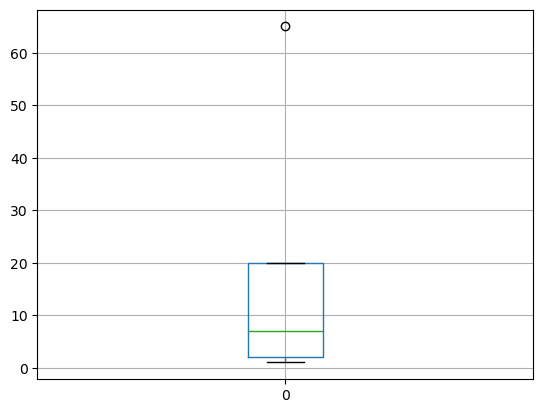

In [50]:
df=pd.DataFrame(np.array([1,2,7,20,65]))
df.boxplot()              # 65==> داده ی پرت(noise)

<Axes: >

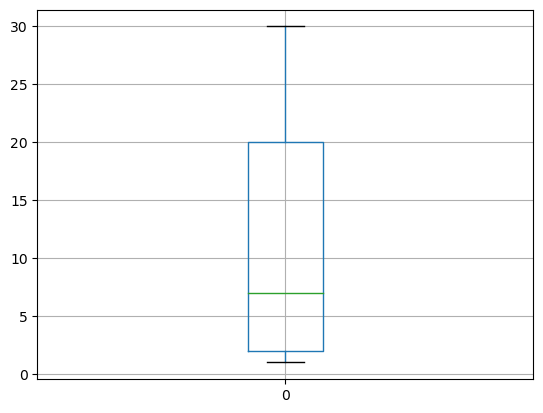

In [51]:
df=pd.DataFrame(np.array([1,2,7,20,30]))
df.boxplot()

In [52]:
q=np.mean(mydata.sat_level)
p=np.mean(mydata.last_eval)
e=np.mean(mydata.avg_hours_mon)
q,p,e

(0.5214903526280772, 0.7669634065202928, 200.99720558882237)

In [53]:
p1=np.percentile(mydata.sat_level,[25,50,75])
p2=np.percentile(mydata.last_eval,[25,50,75])
p3=np.percentile(mydata.num_proj,[25,50,75])
p4=np.percentile(mydata.avg_hours_mon,[25,50,75])
p5=np.percentile(mydata.T_spend,[25,50,75])
p6=np.percentile(mydata.totaT_needed,[25,50,75])
p7=np.percentile(mydata.totaT_spent,[25,50,75])

p1,p2,p3,p4,p5,p6,p7

(array([0.38, 0.54, 0.7 ]),
 array([0.63, 0.8 , 0.91]),
 array([3., 4., 5.]),
 array([155., 199., 246.]),
 array([3., 3., 4.]),
 array([ 8., 12., 20.]),
 array([0., 0., 3.]))

In [54]:
w1=[np.median(mydata.sat_level),np.var(mydata.sat_level)]
w2=[np.median(mydata.last_eval),np.var(mydata.last_eval)]
w3=[np.median(mydata.num_proj),np.var(mydata.num_proj)]
w4=[np.median(mydata.avg_hours_mon),np.var(mydata.avg_hours_mon)]
w5=[np.median(mydata.T_spend),np.var(mydata.T_spend)]
w6=[np.median(mydata.totaT_needed),np.var(mydata.totaT_needed)]
w7=[np.median(mydata.totaT_spent),np.var(mydata.totaT_spent)]

w1,w2,w3,w4,w5,w6,w7

([0.54, 0.050501331743255],
 [0.8, 0.02788972786916812],
 [4.0, 1.6393102639254202],
 [199.0, 2749.5359868685814],
 [3.0, 1.7747428894705064],
 [12.0, 62.83945546034124],
 [0.0, 3.044839113079838])

In [55]:
p_coeff,p_value=pearsonr(mydata.T_spend,mydata.num_proj)
p_coeff    

0.24705177851735535

In [56]:
p_coeff,p_value=pearsonr(mydata.sat_level,mydata.last_eval)
p_coeff

0.39384803151803327

In [57]:
mydata.drop(['num_proj','avg_hours_mon','T_spend','work_acc','left','promo_last5yrs','salary','Dept','totaT_spent','totaT_needed'],axis=1,inplace=True)
mydata

,sat_level,last_eval
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
11998,0.33,0.65
11999,0.50,0.73
12000,0.38,0.53
12029,0.38,0.50


In [58]:
mydata.reset_index(drop=True, inplace=True)
mydata

,sat_level,last_eval
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
7510,0.33,0.65
7511,0.50,0.73
7512,0.38,0.53
7513,0.38,0.50


In [59]:
cor=mydata.corr()
cor

,sat_level,last_eval
sat_level,1.000000,0.393848
last_eval,0.393848,1.000000


<Axes: >

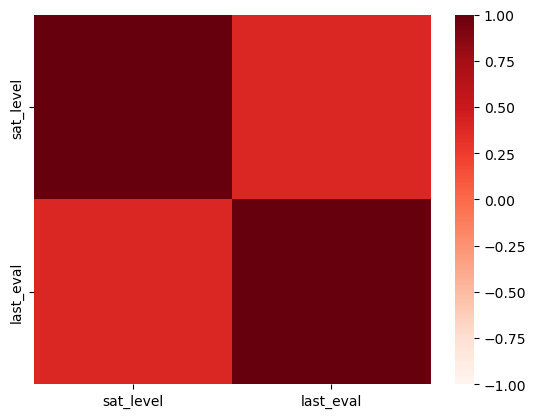

In [67]:
sb.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,vmin=-1,vmax=1,cmap='Reds')

In [61]:
mydata.describe()

,sat_level,last_eval
count,7515.00000,7515.000000
mean,0.52149,0.766963
std,0.22474,0.167013
min,0.09000,0.360000
25%,0.38000,0.630000
50%,0.54000,0.800000
75%,0.70000,0.910000
max,1.00000,1.000000


In [62]:
mydata.isnull().sum()

sat_level    0
last_eval    0
dtype: int64

In [ ]:
# Fin #